In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error, r2_score

# Load model and data
model = joblib.load('/content/linear_regression_model.pkl')
X_test = pd.read_csv('/content/X_test.csv')
y_test = pd.read_csv('/content/y_test.csv').values.ravel()

In [2]:
# Make predictions
y_pred = model.predict(X_test)

In [3]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Evaluation Metrics:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Evaluation Metrics:
MSE: 12.01
RMSE: 3.47
R-squared: 0.75


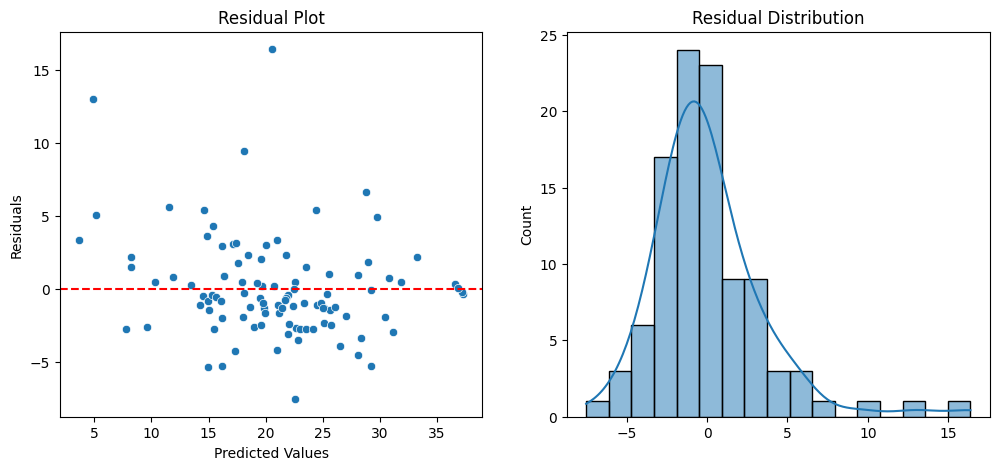

In [4]:
# Residual analysis
residuals = y_test - y_pred

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.show()


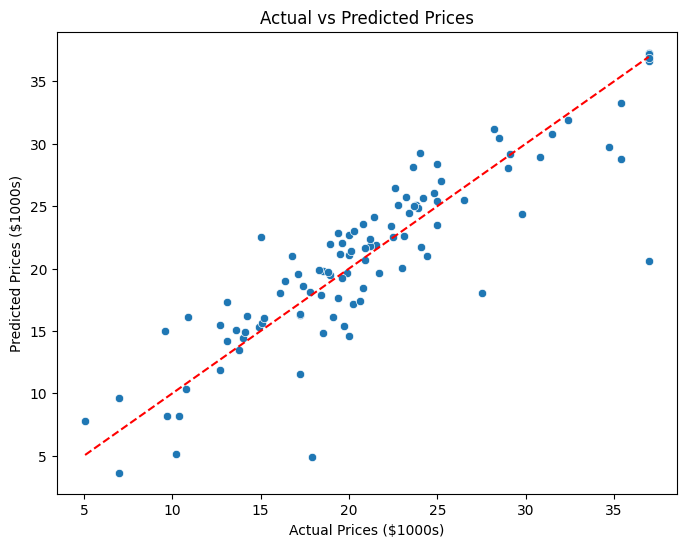

In [5]:
# Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices ($1000s)')
plt.ylabel('Predicted Prices ($1000s)')
plt.show()


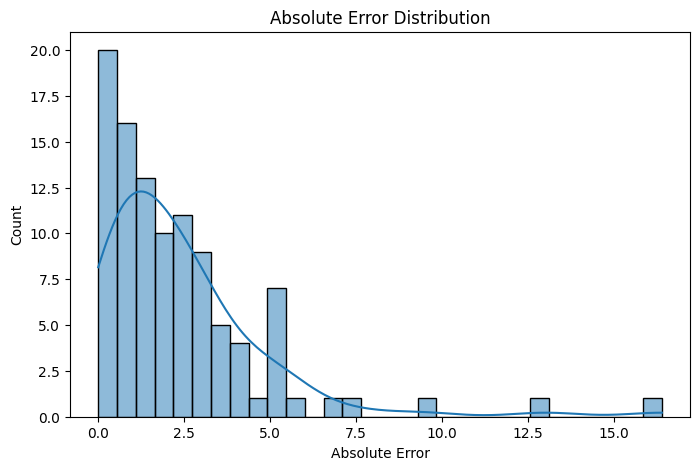

In [6]:
# Error distribution
errors = abs(y_test - y_pred)
plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=30, kde=True)
plt.title('Absolute Error Distribution')
plt.xlabel('Absolute Error')
plt.show()